In [102]:
# Import required libraries
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [103]:
# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Download the MNIST training dataset
train_data = datasets.MNIST(
    root='data',       # where to save the data
    train=True,        # training set
    download=True,     # download if not already present
    transform=transform  # apply transformation
)

# Download the MNIST test dataset
test_data = datasets.MNIST(
    root='data',
    train=False,       # test set
    download=True,
    transform=transform
)
# If the output when running this block is 100%, the dataset was downloaded and stored correctly

5


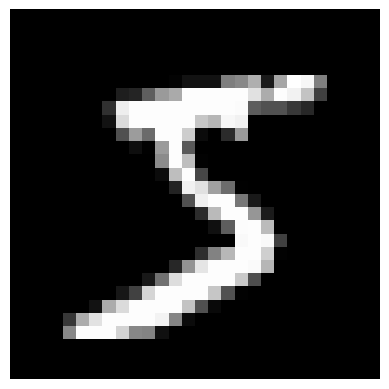

In [104]:
# Get one sample and print its label, then show the image using matplotlib
image_tensor, label = train_data[0]  # get the first sample
print(label)  # print the label

# Visualize the first image in the training set
image_tensor = train_data[0][0]
image_to_plot = image_tensor.squeeze()
plt.imshow(image_to_plot, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Define a simple neural network for digit classification
class CNNclassifier(nn.Module):  # 1. Inherit from nn.Module
    def __init__(self):
        super().__init__()  # 2. Init the base class
        self.conv1 = nn.Conv2d(1,8,(3,3))
        self.pool1 = nn.MaxPool2d((2,2)) 
        self.conv2 = nn.Conv2d(8,16,(3,3))
        self.pool2 = nn.MaxPool2d((2,2)) 
        self.fc1 = nn.Linear(400, 128)
        self.fc2 = nn.Linear(128, 10)
         # Hidden layer: 784 input features (28x28 pixels) to 128
         # Output layer: 128 features to 10 classes (digits 0-9)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x  

In [ ]:
# Create a DataLoader for batching the training data
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

# Instantiate the model
instance = CNNclassifier()
# Define the optimizer
optimizer = torch.optim.SGD(instance.parameters(), lr=0.02)

# List to store loss values
losses = []

# Training loop (one epoch)
for images, labels in train_dataloader:
    # Forward pass: compute model output
    model = instance(images)
    # Define the loss function
    criterion = nn.CrossEntropyLoss()
    loss = criterion(model, labels)
    losses.append(loss.item())  # Store loss value
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(loss.item())

In [ ]:
# Plot the loss curve
#plt.figure(figsize=(8, 4))
#plt.plot(losses, label='Training Loss')
#plt.xlabel('Batch')
#plt.ylabel('Loss')
#plt.title('Training Loss Curve')
#plt.legend()
#plt.show()

In [ ]:
# Create a DataLoader for batching the test data
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)
correct = 0
total = 0
# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = instance(images)  # Get model predictions
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Print and visualize incorrect predictions
        #for i in range(len(labels)):
          #  if predicted[i] != labels[i]:
           #     print(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")
            #    image_tensor = images[i][0]
             #   image_to_plot = image_tensor.squeeze()
              #  plt.imshow(image_to_plot, cmap='gray')
               # plt.axis('off')
                #plt.show()
# Calculate and print accuracy
accuracy = 100 * correct / total
print(accuracy)

90.62


In [108]:
# Visualize the model summary and architecture
from torchsummary import summary
from torchviz import make_dot

# Print a summary of the model (input shape: 1x28x28 for MNIST)
summary(instance, (1, 28, 28))

# Visualize the computation graph for a single batch
sample_input = torch.randn(1, 1, 28, 28)
output = instance(sample_input)
dot = make_dot(output, params=dict(list(instance.named_parameters())))
dot.format = 'png'
dot.render('cnn_classifier_graph', view=False)  # Saves as cnn_classifier_graph.png in the current directory
print('Model graph saved as cnn_classifier_graph.png')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
         MaxPool2d-2            [-1, 8, 12, 12]               0
            Conv2d-3           [-1, 16, 10, 10]           1,168
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 128]          51,328
            Linear-6                   [-1, 10]           1,290
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.21
Estimated Total Size (MB): 0.27
----------------------------------------------------------------
Model graph saved as cnn_classifier_graph.png
